In [98]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import math
import datetime 
import scipy.optimize as sco
import scipy.interpolate as sci
from pylab import plt, mpl
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

In [100]:
from arch import arch_model

In [101]:
plt.style.use('seaborn')

https://www.bankrate.com/investing/best-etfs/ 

Invesco QQQ Trust (QQQ) - Non-financial Nasdaq - Tech-heavy

iShares Core S&P 500 ETF (IVV) - Black Rock - very low cost

ProShares VIX Short-Term Futures ETF (VIXY) - ETF on VIX (volatility)

Vanguard High Dividend Yield (VYM) - FTSE high-dividend paying stocks

Vanguard Health Care Index Fund (VHT)

https://www.thebalance.com/best-etfs-4173857

iShares Russell 2000 ETF (IWM) - Small cap stock

SPDR Gold Trust (GLD)

Vanguard FTSE Developed Markets (VEA) - Develeoped contries except USA




Vanguard FTSE Europe Index Fund ETF Shares (VGK)

iShares Short Treasury Bond ETF (SHV)

iShares 20+ Year Treasury Bond ETF (TLT)

iShares Core € Corp Bond UCITS ETF (IEAC)

In [102]:
# List shares of interest as Yahoo Fiance "Ticker"/"Symbol"
mylist = ['QQQ', 'IVV', 'VIXY', 'VYM', 'VHT', 'IWM', 'GLD', 'VEA', 'VGK', 'SHV', 'TLT']
        # ["danske.co", "MAERSK-B.CO", 'CHR.CO', "NZYM-B.CO", 'LUN.CO', 'GN.CO', 'CARL-B.CO', 'GEN.CO', 'ORSTED.CO']
noa = len(mylist)

# Create DataFrame to store data
df = pd.DataFrame()
df_change = pd.DataFrame()
rets = pd.DataFrame()

In [108]:
for x in mylist:
    df[x] = pdr.get_data_yahoo(x, start=datetime.datetime(2011, 1, 1))['Adj Close'] 
    df_change['pct_c_{}'.format(x)] = df[x].pct_change()   # 
    rets[x] = np.log(df[x] / df[x].shift(1))*100

In [427]:
rets.describe().round(4)

,QQQ,IVV,VIXY,VYM,VHT,IWM,GLD,VEA,VGK,SHV,TLT
count,2154.0000,2154.0000,2153.0000,2154.0000,2154.0000,2154.0000,2154.0000,2154.0000,2154.0000,2154.0000,2154.0000
mean,0.0628,0.0484,-0.2832,0.0466,0.0573,0.0373,-0.0015,0.0182,0.0187,0.0020,0.0269
std,1.0771,0.9095,3.9898,0.8025,0.9680,1.1779,0.9798,1.0770,1.2408,0.0129,0.8438
min,-6.2077,-6.6961,-14.0731,-5.4618,-5.8184,-9.1085,-9.1905,-8.5445,-11.9779,-0.0634,-5.1767
25%,-0.3875,-0.3170,-2.4152,-0.2957,-0.3931,-0.5376,-0.4911,-0.4731,-0.5205,-0.0090,-0.4792
50%,0.1041,0.0633,-0.5790,0.0550,0.1015,0.1074,0.0283,0.0706,0.0662,0.0000,0.0724
75%,0.6384,0.5050,1.4278,0.4765,0.6076,0.7026,0.4942,0.5961,0.6864,0.0091,0.5444
max,6.0567,5.0214,29.4433,3.8720,4.5268,6.4519,4.7874,6.4379,8.0532,0.0545,3.8889


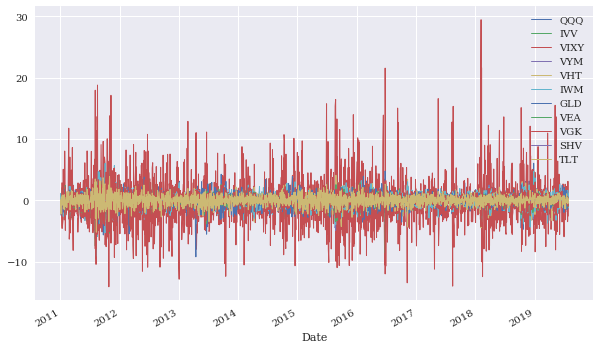

In [110]:
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
rets.plot(lw=1.0, figsize=(10,6))  #.cumsum()

In [8]:
# Random assigned weight
weights = np.random.random(noa)
weights /= np.sum(weights) 
weights

array([0.12368817, 0.11917545, 0.07344329, 0.09545882, 0.06495627,
       0.12834034, 0.02376716, 0.11085999, 0.1301572 , 0.02786899,
       0.10228433])

In [9]:
# Expected portfolio return (annualized)
EPR = np.sum(rets.mean() * weights) * 252

# Portfolio Variance annualized
PV = np.dot(weights.T, np.dot(rets.cov() * 252, weights))

# Portfolio Volatility (Standard deviation)
P_std = math.sqrt(PV)

display(EPR, PV, P_std)

0.032448023432603335

0.00645246207672886

0.08032721877874809

In [111]:
# Monte Carlo simulation

def port_ret(weights):
    return np.sum(rets.mean() * weights) *252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    
p_rets = []
p_vols = []
    
for p in range (50000):
    weights = np.random.random(noa)
    weights /= np.sum(weights) 
    p_rets.append(port_ret(weights))
    p_vols.append(port_vol(weights))
    
p_rets = np.array(p_rets)
p_vols = np.array(p_vols)

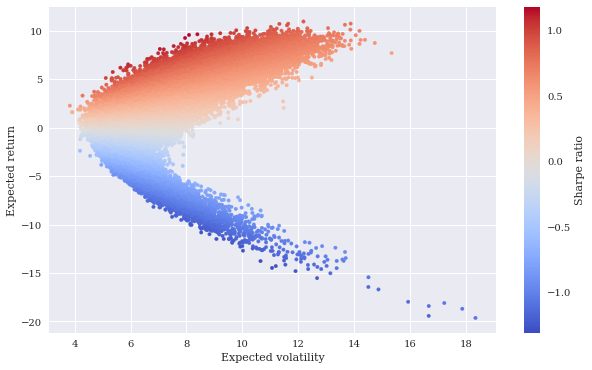

In [112]:
plt.figure(figsize=(10,6))
plt.scatter(p_vols, p_rets, c=p_rets / p_vols, marker = '.', cmap='coolwarm')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

In [122]:
# Maximisation of Sharpe Ratio 

# Function to minimize
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

# Equality constraint
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for parameters
bnds = tuple((0,1) for x in range(noa))

# Equal weights 
eweights = np.array(noa * [1. / noa,])

print('Equal weight sharp ratio = ', -min_func_sharpe(eweights).round(4))

Equal weight sharp ratio =  0.132


In [123]:
# Max return
#%%time
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)
#print(opts)
print('opts = opt. port. weights = ', opts['x'].round(3))
print('port_ret = ', port_ret(opts['x']).round(3))
print('port_vol = ', port_vol(opts['x']).round(3))
print('Maximum Sharpe Ratio = ', port_ret(opts['x']) / port_vol(opts['x']))

opts = opt. port. weights =  [0.002 0.    0.    0.004 0.003 0.    0.    0.    0.    0.986 0.005]
port_ret =  0.657
port_vol =  0.232
Maximum Sharpe Ratio =  2.826977811228623


In [124]:
# Minimize Vol
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
print('weights = ', optv['x'].round(3))
print('Minimum vol = ', port_vol(optv['x']).round(3))
print('return = ', port_ret(optv['x']).round(3))
print('Sharpe ratio = ', (port_ret(optv['x']) / port_vol(optv['x'])).round(3))

weights =  [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.999 0.   ]
Minimum vol =  0.205
return =  0.519
Sharpe ratio =  2.536


In [127]:
# Effecient Frontier pp. 224

# Binding Constraint for efficient frontier
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds
bnds = tuple((0,1) for x in weights)

# Target Return
trets = np.linspace(0.0, 15.0, 50) # We want to find minimum vol portfolios to each target return (trets).

tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])

# Store tvols as numpy array
tvols = np.array(tvols)


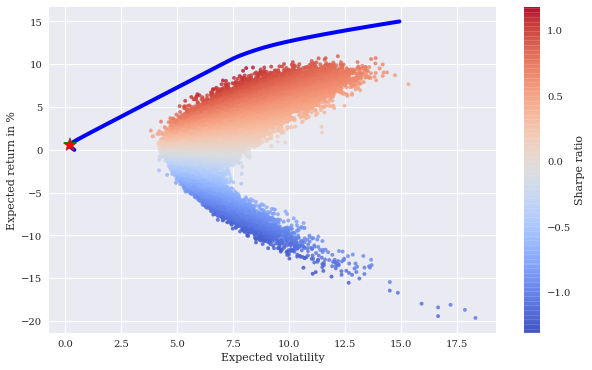

In [128]:
plt.figure(figsize=(10,6))
plt.scatter(p_vols, p_rets, c=p_rets / p_vols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'g*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return in %')
plt.colorbar(label='Sharpe ratio')

In [129]:
# Capital Market Line pp. 425

# Index position of minimum vol portfolio
ind = np.argmin(tvols)
evols = tvols[ind:]     # Relevant portfolio vol
erets = trets[ind:]     # Relevant portfolio ret

tck = sci.splrep(evols, erets)   # Cubic splines interpolation on these values

def f(x):
    '''Effecient frontier function (splines approximation).'''
    return sci.splev(x, tck, der=0)

def df(x):
    '''First derivative of Efficient frontier fct.'''
    return sci.splev(x, tck, der=1)

In [132]:
# page 427
def equations(p, rf=1.0):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

opt = sco.fsolve(equations, [0.01, 0.2, 0.1])

print('Optimal parameter values = ', opt.round(4))

print('Check that eq holds:', np.round(equations(opt), 6))

Optimal parameter values =  [1.     1.2878 7.4449]
Check that eq holds: [ 0.  0. -0.]


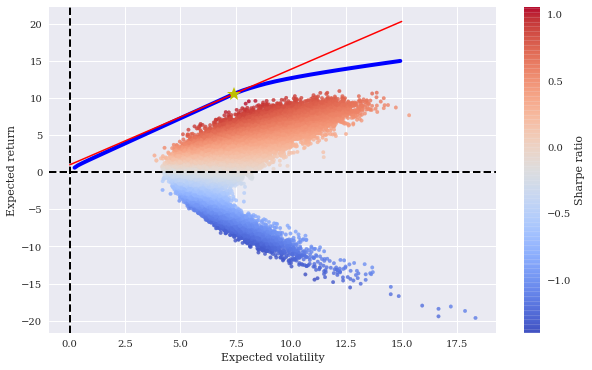

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(p_vols, p_rets, c=(p_rets-1.0) / p_vols,                      # Check rf = 0.01
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)

cx = np.linspace(0.0, 15.0)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)

plt.plot(opt[2], f(opt[2]), 'y*', markersize=15)

plt.grid(True)

plt.axhline(0,color='k', ls='--', lw=2.0)
plt.axvline(0,color='k', ls='--', lw=2.0)

plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')

In [138]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(opt[2])},
    {'type': 'eq', 'fun': lambda x: np.sum(x)-1})

res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [139]:
res

     fun: 7.44348810481608
     jac: array([ 1.15402381e+01,  9.48199445e+00, -3.58452119e+01,  8.35044688e+00,
        1.04609875e+01,  1.06686373e+01,  1.93137240e+00,  8.92645073e+00,
        9.36036664e+00,  7.03960657e-03,  4.45651710e+00])
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.44586779e-01, 6.86833969e-15, 0.00000000e+00, 2.67533933e-01,
       1.53385783e-01, 0.00000000e+00, 6.01391918e-15, 0.00000000e+00,
       0.00000000e+00, 2.08184158e-14, 4.34493505e-01])

In [140]:
print('weights:',res['x'].round(3))
print('return',port_ret(res['x']).round(4))
print('vol',port_vol(res['x']).round(4))

weights: [0.145 0.    0.    0.268 0.153 0.    0.    0.    0.    0.    0.434]
return 10.5874
vol 7.4435


## Moving on to GARCH modelleing

In [374]:
squared_rets = rets ** 2

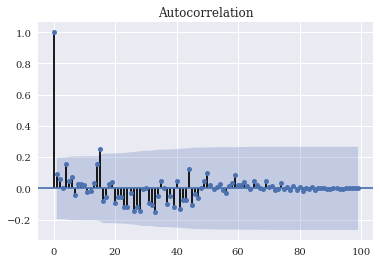

In [394]:
plot_acf(squared_rets['QQQ'][-100:])
pyplot.show()

In [423]:
# split into train/test
n_test = 30
train, test = rets['QQQ'][1:-n_test], rets['QQQ'][-n_test:]

# define GARCH model
model = arch_model(train, mean='Constant', vol='GARCH', p=1, q=1)

In [425]:
# fit model
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2953.4423248088133
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2950.9200483769437
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2947.755356733608
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2946.7217779715993
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2944.9611786862038
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2943.69398928825
Iteration:      7,   Func. Count:     51,   Neg. LLF: 2943.1817270064807
Iteration:      8,   Func. Count:     58,   Neg. LLF: 2942.5560324084036
Iteration:      9,   Func. Count:     64,   Neg. LLF: 2942.5483457329583
Iteration:     10,   Func. Count:     70,   Neg. LLF: 2942.5478226833675
Iteration:     11,   Func. Count:     76,   Neg. LLF: 2942.5478201674787
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2942.547820168288
            Iterations: 11
            Function evaluations: 76
            Gradient evalua

In [431]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    QQQ   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2942.55
Distribution:                  Normal   AIC:                           5893.10
Method:            Maximum Likelihood   BIC:                           5915.74
                                        No. Observations:                 2124
Date:                Mon, Jul 29 2019   Df Residuals:                     2120
Time:                        14:46:22   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0989  1.968e-02      5.024  5.050e-07 [6.032e-02,  0.137]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0613  1.517e-02      4.043  5.276e-05 [3.161e-02,9.109e-02]
alpha[1]       0.1371  2.475e-02      5.538  3.054e-08   [8.858e-02,  0.186]
beta[1]        0.8096  2.965e-02     27.301 4.106e-164     [  0.751,  0.868]
============================================================================

Covariance estimator: robust
"""

TypeError: 'Figure' object does not support indexing

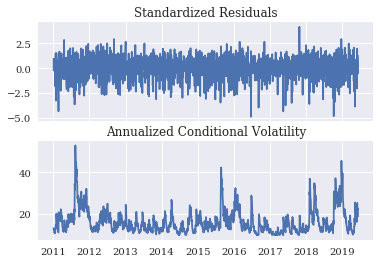

In [550]:
fig = res.plot(annualize='D')

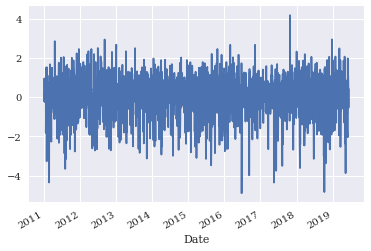

In [562]:
#Compute standardized residuals as residuals/cond.vol

std_resid = res.resid / res.conditional_volatility
std_resid.plot()

In [515]:
Coef_1 = res.summary().tables[1]
Coef_2 = res.summary().tables[2]
display(Coef_1, Coef_2)

,coef,std err,t,P>|t|,95.0% Conf. Int.
mu,0.0989,1.968e-02,5.024,5.050e-07,"[6.032e-02, 0.137]"


,coef,std err,t,P>|t|,95.0% Conf. Int.
omega,0.0613,1.517e-02,4.043,5.276e-05,"[3.161e-02,9.109e-02]"
alpha[1],0.1371,2.475e-02,5.538,3.054e-08,"[8.858e-02, 0.186]"
beta[1],0.8096,2.965e-02,27.301,4.106e-164,"[ 0.751, 0.868]"


In [402]:
# forecast the test set
forecasts = res.forecast(horizon=n_test)
F_V = forecasts.variance.dropna().values.T
#F_V

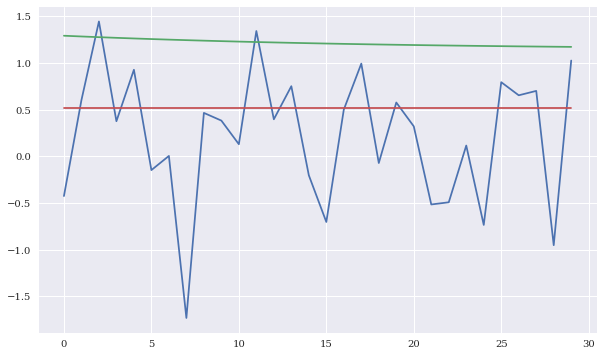

In [417]:
plt.figure(figsize=(10,6))

# plot the actual variance
var = test
plt.plot(var.values)

# plot forecast variance
plt.plot(F_V)

plt.plot(np.full((1,n_test), test.var()).T)

plt.show()

## Simulation

\begin{align}
    r_{t+1} &= \mu + \sigma_{t+1} z_{t+1} \\
    \sigma^2_{t+1} &= \omega + \alpha r_t^2 + \beta \sigma_t^2  \\
    z &\sim \textit{i.i.d. } \mathcal{N}(0,1)
\end{align}

In [432]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [471]:
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [681]:
npr.seed(741)
N = n_test
z = np.random.rand(N)

sim_ret = np.empty(N)
sim_ret.fill((train[-1]))

sim_sigma = np.empty(N)
sim_sigma.fill(((train[-1] - mu)/ std_resid[-n_test:-n_test+1])[0])

mu = 0.0989
omega = 0.0613
alpha =  0.1371
beta = 0.8096

In [682]:
for n in range(N-1):
    sim_ret[n+1] = mu + sim_sigma[n] * z[n]
    sim_sigma[n+1] =  math.sqrt(omega + alpha * sim_ret[n]**2 + beta * sim_sigma[n]**2)

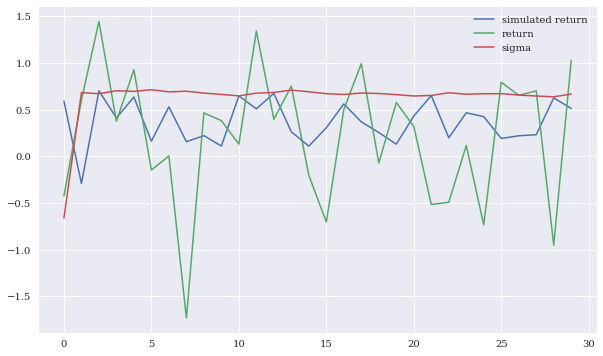

In [685]:
plt.figure(figsize=(10,6))
plt.plot(sim_ret, lw=1.5, label='simulated return')
plt.plot(var.values, lw=1.5, label='return')
plt.plot(sim_sigma, lw=1.5, label='sigma')
plt.legend()
plt.show()